<a href="https://colab.research.google.com/github/MunkhtulgaB/fairness/blob/main/Fairness_final_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction**


## **1.1 Background**


Machine Learning (ML) algorithms are increasingly prevalent in every aspect of our society.  They decide who will be hired, who should get a loan and which criminals are likely to re-offend [10].  These decisions,  which have historically been determined by humans, are being entrusted to algorithms [12].  However a number of high-profile cases of algorithmic discrimination in facial recognition technology [6], criminal justice [15] and more [4] has led to increased scrutiny.

In  order  to  mitigate  discrimination  and  bias  in  ML  algorithms,  one  must define fairness.  Ultimately,  there is no universal fairness measure and,  consequently, no clear guideline for which of the current metrics are the ”best” [7].This work will explore how to evaluate fairness through different metrics and mitigate different types of bias in machine learning models to observe its effecton various metrics.

Our explorations will be on two datasets:  COMPAS [13] and ADULT [17].Preliminary analysis will compare fairness of predictions made by standard MLmodels before and after a mitigation process.  Before that, the next section will introduce the relevant literature on fairness, which includes relevant definitions of bias and fairness,  overview of mitigation techniques,  and summary of used (in the preliminary analysis) mitigation technique, datasets and ML models.

## **1.2 Relevant Literature**

This section will provide a brief account of existing literature on fairness andbias.  Then it will explore approaches to fair machine learning, including opensource libraries and published research.

**Bias** This  section  will  outline  existing  research  into  different  types  of  bias and discrimination.  Appendix A describes six prominent forms of bias with an example for each.  This highlights the range of conditions and situations thatcan result in machine learning bias.  For more extensive reviews of types of bias, see [11, 7, 16].  It is essential that any tool developed to measure the fairness of an algorithm considers the different types of bias that can arise. 

**Fairness** As  with  bias,  fairness  can  be  defined  in  many  ways.   In  order  to ensure  a  machine  learning  model  is  fair,  it  is  important  to  consider  the wide range of definitions.  A list of used fairness metrics is presented below [11,  7,18].  



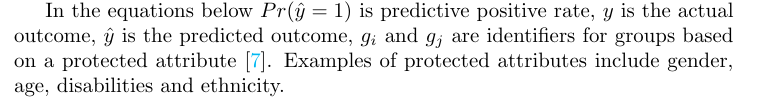

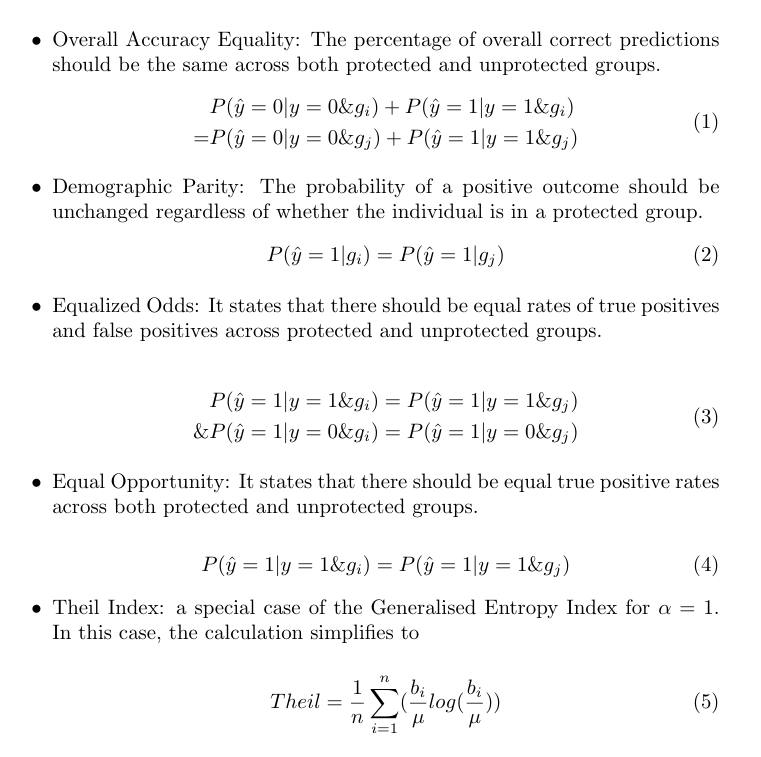



Mitigation There is a great deal of research on addressing bias in ML to achieve fair decision making.  The specific approaches and libraries will be introduced soon in this section. Generally, these approaches can be categorised as one of the following types:



1.   Pre-processing: modifying the training data to remove underlying discrimination in the data.
2.   In-processing:  modifying the learning algorithm, such as altering the objective function or introducing techniques, to remove discrimination in the training process.
3.   Post-processing:  evaluation of a trained ML model in order to remove or identify bias.

Fairness can be achieved by identifying and mitigating bias in either the data, the  algorithm  or  both.   These  three  approaches  are  appropriate  in  different situations dependent on the source of the bias.

**Post-processing** In  this  work,  we  are  interested  in  post-processing  mitigation.  Two methods of particular interest are Equalised Odds Post-processing [8,  14]  and  Reject  Option  Classification  (ROC)  [9].   Both  of  these  are  implemented in AI Fairness 360 library [2] with Apache 2.0 license. 
**Datasets** We will study the following two datasets in this work:
1.  COMPAS [13]: The first case-study is a criminal recidivism predictor usingthe Correctional Offender Management Profiling for Alternative Sanctions(COMPAS) dataset and predictions [13].  An investigation into this soft-ware and dataset found that it was biased against African-Americans, asit assigned them higher risk profiles than Caucasians with the same pro-file [1].  This dataset is commonly used in the machine learning fairnessdomain.  As a result, this case-study will provide a benchmark to compareour research to existing methods.
2.  ADULT [17]:  contains 16 attributes, 45,225 cases and is used to predictwhether an person’s annual income is greater than$50,000 from evaluatingcensus data.

**Machine Learning models** We use two Machine Learning (ML) models/algorithms to make predictions in this work. These are:
1.  Linear Regression (LR)
2.  Random Forest Classifier (RFC) [5]

**Relevant libraries** Finally,  we  consider  two  public  libraries  for  our  explorations.  We will use the first (AIF360 [2]) library in this work.

1. AIF360 [2]:  This is a well-documented library that offers numerous bias mitigation algorithms and comprehensive set of group fairness and sample distortion metrics.  Available post-processing methods include Equalised-Odds Post-processing, Calibrated Equalised-Odds Post-processing, and Reject Option Classification.

2. Aequitas, [15]:  Aequitas is also well-documented and offers wide  range  of  confusion  matrix  metrics.   This  is  promising  for  further defining  what  are  referred  to  as  Confusion  Matrix-based  Metrics  in  [7], which include Equalised Odds and Equal Opportunity.

## **1.3 Preliminary data analysis**



### Set up
We will import the datasets through AIF360. Let us start by installing the `aif360` library and downloading the datasets.


**Warning!** When downloading datasets, download directory may vary at runtime. In that case, AIF360 will print in an error where instead to download the datasets into.  




#### Install dependencies

In [ ]:
!git clone https://github.com/Trusted-AI/AIF360

fatal: destination path 'AIF360' already exists and is not an empty directory.


In [ ]:
%cd AIF360 

/content/AIF360


In [ ]:
%pip install '.[all]'

Processing /content/AIF360
     |████████████████████████████████| 552kB 20.0MB/s 
  Created wheel for aif360: filename=aif360-0.4.0-cp37-none-any.whl size=557691 sha256=34ca1f768f498e48d3ad0b13bd252d2e025224740f236f4289fe5c808b7ac440
  Stored in directory: /tmp/pip-ephem-wheel-cache-1_xxvfpi/wheels/98/c1/ab/d8fba482498b80dd95f0c1940d349fb383ee734c04245e4a8e
Successfully built aif360
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: aif360 0.4.0
    Uninstalling aif360-0.4.0:
      Successfully uninstalled aif360-0.4.0
  Found existing installation: docutils 0.17
    Uninstalling docutils-0.17:
      Successfully uninstalled docutils-0.17


#### Download datasets

**Warning!** Download directory may vary at runtime. In that case, AIF360 will print in an error where instead to download the datasets into. The directory must end with `aif360/data/raw/`

In [ ]:
import urllib.request 

# URLs to download the ADULT and COMPAS datasets from. 
urls = [
  "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
	"https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",
	"https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names",
  "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
]

"""
Warning! 
Download directory/folder may vary at runtime. 
In that case, AIF360 will print in an error where instead to download the 
datasets into. Change the variable download_directory below to the printed
directory/folder then.
"""
download_directory = "/usr/local/lib/python3.7/dist-packages/aif360/data/raw/"


filenames = [
  download_directory + "adult/adult.data",
  download_directory + "adult/adult.test",
  download_directory + "adult/adult.names",
  download_directory + "compas/compas-scores-two-years.csv"
]

for i in range(len(urls)):
  url = urls[i]
  filename = filenames[i]
  urllib.request.urlretrieve(url, filename)
  print("File at " + url)
  print("Downloaded to " + filename)

File at https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Downloaded to /usr/local/lib/python3.7/dist-packages/aif360/data/raw/adult/adult.data
File at https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test
Downloaded to /usr/local/lib/python3.7/dist-packages/aif360/data/raw/adult/adult.test
File at https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
Downloaded to /usr/local/lib/python3.7/dist-packages/aif360/data/raw/adult/adult.names
File at https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv
Downloaded to /usr/local/lib/python3.7/dist-packages/aif360/data/raw/compas/compas-scores-two-years.csv


In [ ]:
%cd examples

/content/AIF360/examples


#### Import dependencies

In [ ]:
%matplotlib inline
# Load all necessary packages
import sys
sys.path.append("../")
import numpy as np
from tqdm import tqdm
from warnings import warn

from aif360.datasets import BinaryLabelDataset
from aif360.datasets import AdultDataset, GermanDataset, CompasDataset
from aif360.metrics import ClassificationMetric, BinaryLabelDatasetMetric
from aif360.metrics.utils import compute_boolean_conditioning_vector
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions\
        import load_preproc_data_adult, load_preproc_data_german, load_preproc_data_compas
from aif360.algorithms.postprocessing.reject_option_classification\
        import RejectOptionClassification
from common_utils import compute_metrics

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from IPython.display import Markdown, display
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider

#### Define function to visualise metrics

In [ ]:
def visualise_metrics(dataset, classified_dataset, 
                      unpriv_groups, priv_groups, 
                      protected_attribute_maps,
                      protected_attribute_names,
                      label_name):
  dataset_df, _ = dataset.convert_to_dataframe()
  classified_dataset_df, _ = classified_dataset.convert_to_dataframe()

  metric_names = ["true_positive_rate", "true_negative_rate", "false_positive_rate", "false_negative_rate", "selection_rate"]
  
  y_true = dataset_df[label_name].to_numpy()
  y_pred = classified_dataset_df[label_name].to_numpy()

  overall_accuracy = len(y_pred[y_true == y_pred]) / len(y_true)
  print("Overall accuracy", f'{overall_accuracy:.3f}')

  all_groups = [list(group.items()) for group in unpriv_groups + priv_groups]
  all_groups = sum(all_groups, [])
  group_scores = []

  for (key, value) in all_groups:

    labels = dataset_df.loc[dataset_df[key] == value][label_name].to_numpy()
    predictions = classified_dataset_df.loc[classified_dataset_df[key] == value][label_name].to_numpy()
    
    accurate = predictions[predictions==labels]
    non_accurate = predictions[predictions!=labels]

    true_positive_rate = len(accurate[accurate == dataset.favorable_label]) / len(labels[labels == dataset.favorable_label])
    true_negative_rate = len(accurate[accurate == dataset.unfavorable_label]) / len(labels[labels == dataset.unfavorable_label])
    false_positive_rate = len(non_accurate[non_accurate == dataset.favorable_label]) / len(labels[labels == dataset.unfavorable_label])
    false_negative_rate = len(non_accurate[non_accurate == dataset.unfavorable_label]) / len(labels[labels == dataset.favorable_label])
    selection_rate = len(predictions[predictions == classified_dataset.favorable_label]) / len(predictions)

    metrics = [
        true_positive_rate,
        true_negative_rate,
        false_positive_rate,
        false_negative_rate,
        selection_rate
    ]
    group_scores.append( metrics )

  # # Uncomment for sanity check
  # print(
  #   "Statistical parity difference",
  #   group_scores[0][metric_names.index("selection_rate")] - group_scores[1][metric_names.index("selection_rate")] 
  # )
  # print(
  #   "Disparate impact",
  #   group_scores[0][metric_names.index("selection_rate")] / group_scores[1][metric_names.index("selection_rate")] 
  # )
  # print(
  #   "Average odds difference",
  #   0.5 * (
  #     (group_scores[0][metric_names.index("true_positive_rate")] - group_scores[1][metric_names.index("true_positive_rate")])
  #     + (group_scores[0][metric_names.index("false_positive_rate")] - group_scores[1][metric_names.index("false_positive_rate")])
  #   )
  # )
  # print(
  #   "Equal opportunity difference",
  #   group_scores[0][metric_names.index("true_positive_rate")] - group_scores[1][metric_names.index("true_positive_rate")]
  # )

  # Visualise the metrics for each group
  import pandas as pd
  from matplotlib import pyplot as plt

  plotdata = pd.DataFrame(
      {"%s %s=%s" % (
          "Unprivileged" if unpriv_groups[0].get(group[0]) == group[1] else "Privileged",
          group[0], 
          protected_attribute_maps[protected_attribute_names.index(group[0])][group[1]]
        ) : group_scores[i] for i, group in enumerate(all_groups)},
      index=metric_names
  )
  plotdata.plot(kind="bar", figsize=(12, 6), color=["#EEA47FFF", "#00539CFF"])
  plt.title("Comparison of metrics for unprivileged vs. privileged groups")
  plt.xticks(rotation=45)
  plt.xlabel("Metric name")
  plt.ylabel("Metric value")

  all_scores = sum(group_scores, [])
  plt.ylim(min(0, min(all_scores)), 
           max(all_scores) * 1.3)

  # Plot bar values on top of the bars
  values = zip(*group_scores)
  for i, metric_values in enumerate(values):
    for j, v in enumerate(metric_values):
      plt.text(i + (j*(0.6/len(metric_values))) - 0.25, v + 0.03, f'{v:.3f}')
    

  plt.show()

### **COMPAS**

In [ ]:
# Setup COMPASS
protected_attribute_used = 2

dataset_orig = CompasDataset()
if protected_attribute_used == 1:
    privileged_groups = [{'sex': 1}]
    unprivileged_groups = [{'sex': 0}]
    dataset_orig = load_preproc_data_compas(['sex'])
else:
    privileged_groups = [{'race': 1}]
    unprivileged_groups = [{'race': 0}]  
    dataset_orig = load_preproc_data_compas(['race'])

In [ ]:
# Get the dataset and split into train and test
dataset_orig_train, dataset_orig_vt = dataset_orig.split([0.7], shuffle=True)
dataset_orig_valid, dataset_orig_test = dataset_orig_vt.split([0.5], shuffle=True)

Describe the data

In [ ]:
# print out some labels, names, etc.
display(Markdown("#### Training Dataset shape"))
print(dataset_orig_train.features.shape)
display(Markdown("#### Favorable and unfavorable labels"))
print(dataset_orig_train.favorable_label, dataset_orig_train.unfavorable_label)
display(Markdown("#### Protected attribute names"))
print(dataset_orig_train.protected_attribute_names)
display(Markdown("#### Privileged and unprivileged protected attribute values"))
print(dataset_orig_train.privileged_protected_attributes, 
      dataset_orig_train.unprivileged_protected_attributes)
display(Markdown("#### Dataset feature names"))
print(dataset_orig_train.feature_names)

#### Training Dataset shape

(3694, 10)


#### Favorable and unfavorable labels

0.0 1.0


#### Protected attribute names

['race']


#### Privileged and unprivileged protected attribute values

[array([1.])] [array([0.])]


#### Dataset feature names

['sex', 'race', 'age_cat=25 to 45', 'age_cat=Greater than 45', 'age_cat=Less than 25', 'priors_count=0', 'priors_count=1 to 3', 'priors_count=More than 3', 'c_charge_degree=F', 'c_charge_degree=M']


Metric for original data

In [ ]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig_train, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.136748


#### ML model 1 (LogisticRegression)

##### **Train classifier on original data**

In [ ]:
scale_orig = StandardScaler()
X_train = scale_orig.fit_transform(dataset_orig_train.features)
y_train = dataset_orig_train.labels.ravel()

lmod = LogisticRegression()
lmod.fit(X_train, y_train)
y_train_pred = lmod.predict(X_train)

# positive class index
pos_ind = np.where(lmod.classes_ == dataset_orig_train.favorable_label)[0][0]

dataset_orig_train_pred = dataset_orig_train.copy(deepcopy=True)
dataset_orig_train_pred.labels = y_train_pred

Obtain scores from validation and test sets

In [ ]:
dataset_orig_valid_pred = dataset_orig_valid.copy(deepcopy=True)
X_valid = scale_orig.transform(dataset_orig_valid_pred.features)
y_valid = dataset_orig_valid_pred.labels
dataset_orig_valid_pred.scores = lmod.predict_proba(X_valid)[:,pos_ind].reshape(-1,1)

dataset_orig_test_pred = dataset_orig_test.copy(deepcopy=True)
X_test = scale_orig.transform(dataset_orig_test_pred.features)
y_test = dataset_orig_test_pred.labels
dataset_orig_test_pred.scores = lmod.predict_proba(X_test)[:,pos_ind].reshape(-1,1)

##### **Find the optimal parameters from the validation set**



Best threshold for classification only (no fairness)

In [ ]:
num_thresh = 100
ba_arr = np.zeros(num_thresh)
class_thresh_arr = np.linspace(0.01, 0.99, num_thresh)
for idx, class_thresh in enumerate(class_thresh_arr):
    
    fav_inds = dataset_orig_valid_pred.scores > class_thresh
    dataset_orig_valid_pred.labels[fav_inds] = dataset_orig_valid_pred.favorable_label
    dataset_orig_valid_pred.labels[~fav_inds] = dataset_orig_valid_pred.unfavorable_label
    
    classified_metric_orig_valid = ClassificationMetric(dataset_orig_valid,
                                             dataset_orig_valid_pred, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
    
    ba_arr[idx] = 0.5*(classified_metric_orig_valid.true_positive_rate()\
                       +classified_metric_orig_valid.true_negative_rate())

best_ind = np.where(ba_arr == np.max(ba_arr))[0][0]
best_class_thresh = class_thresh_arr[best_ind]

print("Best balanced accuracy (no fairness constraints) = %.4f" % np.max(ba_arr))
print("Optimal classification threshold (no fairness constraints) = %.4f" % best_class_thresh)

Best balanced accuracy (no fairness constraints) = 0.6683
Optimal classification threshold (no fairness constraints) = 0.5247


##### Predictions (no fairness)

###### Predictions from validation set

#### Validation set

##### Raw predictions - No fairness constraints, only maximizing balanced accuracy

Balanced accuracy = 0.6683
Statistical parity difference = -0.2889
Disparate impact = 0.5977
Average odds difference = -0.2501
Equal opportunity difference = -0.2343
Theil index = 0.2144
Overall accuracy 0.669


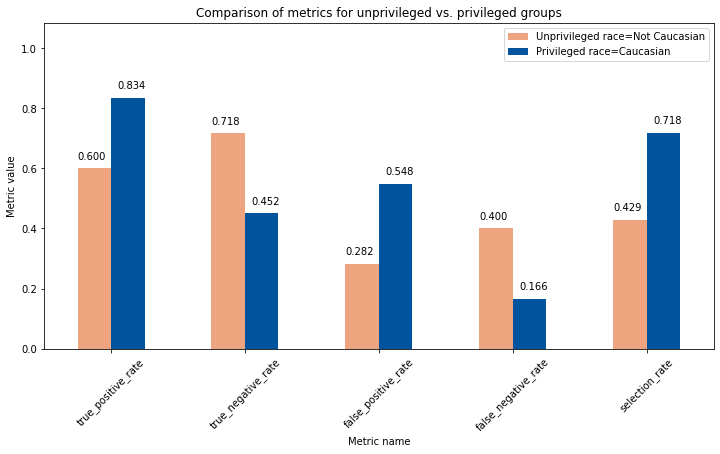

In [ ]:
# Metrics for the test set
fav_inds = dataset_orig_valid_pred.scores > best_class_thresh
dataset_orig_valid_pred.labels[fav_inds] = dataset_orig_valid_pred.favorable_label
dataset_orig_valid_pred.labels[~fav_inds] = dataset_orig_valid_pred.unfavorable_label

display(Markdown("#### Validation set"))
display(Markdown("##### Raw predictions - No fairness constraints, only maximizing balanced accuracy"))

metric_valid_bef = compute_metrics(dataset_orig_valid, dataset_orig_valid_pred, 
                unprivileged_groups, privileged_groups)

protected_attribute_names=['sex', 'race']
protected_attribute_maps = [{0.0: 'Male', 1.0: 'Female'}, {1.0: 'Caucasian', 0.0: 'Not Caucasian'}]

visualise_metrics(dataset_orig_valid, dataset_orig_valid_pred, 
                unprivileged_groups, privileged_groups, 
                protected_attribute_maps, protected_attribute_names,
                "two_year_recid")


###### Predictions from test set

#### Test set

##### Raw predictions - No fairness constraints, only maximizing balanced accuracy

Balanced accuracy = 0.6421
Statistical parity difference = -0.2666
Disparate impact = 0.6290
Average odds difference = -0.2445
Equal opportunity difference = -0.1697
Theil index = 0.2258
Overall accuracy 0.645


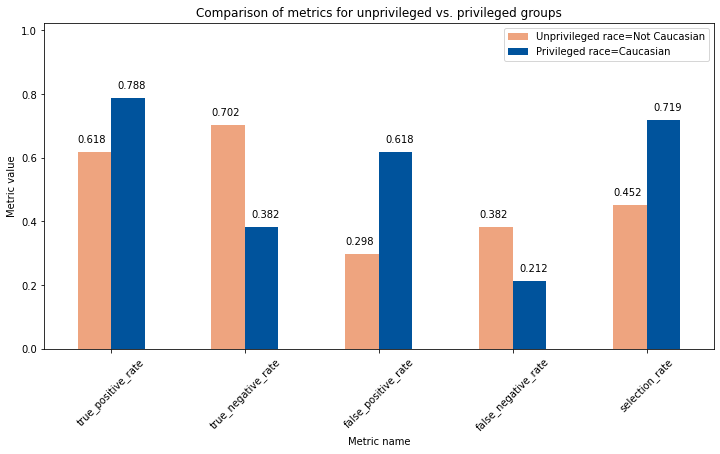

In [ ]:

# Metrics for the test set
fav_inds = dataset_orig_test_pred.scores > best_class_thresh
dataset_orig_test_pred.labels[fav_inds] = dataset_orig_test_pred.favorable_label
dataset_orig_test_pred.labels[~fav_inds] = dataset_orig_test_pred.unfavorable_label

display(Markdown("#### Test set"))
display(Markdown("##### Raw predictions - No fairness constraints, only maximizing balanced accuracy"))

metric_test_bef_COMPAS_LR = compute_metrics(dataset_orig_test, dataset_orig_test_pred, 
                unprivileged_groups, privileged_groups)


visualise_metrics(dataset_orig_test, dataset_orig_test_pred,
                    unprivileged_groups, privileged_groups, 
                    protected_attribute_maps, protected_attribute_names,
                    "two_year_recid")

##### Simple mitigation (ROC)

In [ ]:
# Metric used (should be one of allowed_metrics)
metric_name = "Statistical parity difference"

# Upper and lower bound on the fairness metric used
metric_ub = 0.05
metric_lb = -0.05
        
#random seed for calibrated equal odds prediction
np.random.seed(1)

# Verify metric name
allowed_metrics = ["Statistical parity difference",
                   "Average odds difference",
                   "Equal opportunity difference"]
if metric_name not in allowed_metrics:
    raise ValueError("Metric name should be one of allowed metrics")
    
ROC = RejectOptionClassification(unprivileged_groups=unprivileged_groups, 
                                 privileged_groups=privileged_groups, 
                                 low_class_thresh=0.01, high_class_thresh=0.99,
                                  num_class_thresh=100, num_ROC_margin=50,
                                  metric_name=metric_name,
                                  metric_ub=metric_ub, metric_lb=metric_lb)
ROC = ROC.fit(dataset_orig_valid, dataset_orig_valid_pred)

In [ ]:
print("Best balanced accuracy (no fairness constraints) = %.4f" % np.max(ba_arr))
print("Optimal classification threshold (no fairness constraints) = %.4f" % best_class_thresh)
print()
print("Optimal classification threshold (with fairness constraints) = %.4f" % ROC.classification_threshold)
print("Optimal ROC margin = %.4f" % ROC.ROC_margin)

Best balanced accuracy (no fairness constraints) = 0.6683
Optimal classification threshold (no fairness constraints) = 0.5247

Optimal classification threshold (with fairness constraints) = 0.6039
Optimal ROC margin = 0.0808


##### Predictions (with fairness)

###### Predictions from validation set


#### Validation set

##### Transformed predictions - With fairness constraints

Balanced accuracy = 0.6697
Statistical parity difference = -0.0167
Disparate impact = 0.9625
Average odds difference = 0.0312
Equal opportunity difference = -0.0022
Theil index = 0.2717
Overall accuracy 0.668


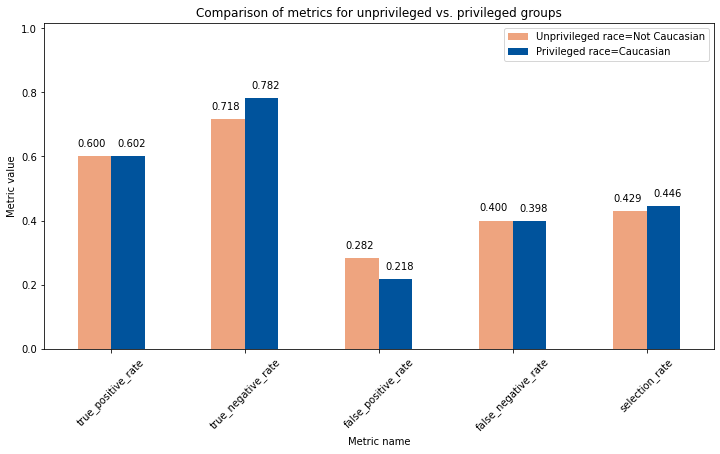

In [ ]:
# Transform the validation set
dataset_transf_valid_pred = ROC.predict(dataset_orig_valid_pred)

display(Markdown("#### Validation set"))
display(Markdown("##### Transformed predictions - With fairness constraints"))
metric_valid_aft = compute_metrics(dataset_orig_valid, dataset_transf_valid_pred, 
                unprivileged_groups, privileged_groups)

visualise_metrics(dataset_orig_valid, dataset_transf_valid_pred,
                    unprivileged_groups, privileged_groups, 
                    protected_attribute_maps, protected_attribute_names,
                    "two_year_recid")

###### Predictions from test set

#### Test set

##### Transformed predictions - With fairness constraints

Balanced accuracy = 0.6218
Statistical parity difference = 0.0568
Disparate impact = 1.1436
Average odds difference = 0.0777
Equal opportunity difference = 0.1586
Theil index = 0.3228
Overall accuracy 0.617


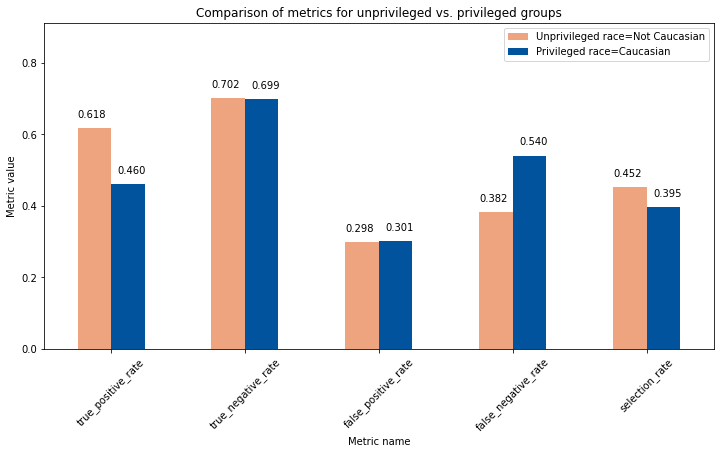

In [ ]:
# Metrics for the transformed test set
dataset_transf_test_pred = ROC.predict(dataset_orig_test_pred)

display(Markdown("#### Test set"))
display(Markdown("##### Transformed predictions - With fairness constraints"))
metric_test_aft_COMPAS_LR = compute_metrics(dataset_orig_test, dataset_transf_test_pred, 
                unprivileged_groups, privileged_groups)

visualise_metrics(dataset_orig_test, dataset_transf_test_pred,
                    unprivileged_groups, privileged_groups, 
                    protected_attribute_maps, protected_attribute_names,
                    "two_year_recid")

#### ML model 2 (RandomForestClassifier)

##### **Train classifier on original data**

In [ ]:
scale_orig = StandardScaler()
X_train = scale_orig.fit_transform(dataset_orig_train.features)
y_train = dataset_orig_train.labels.ravel()

lmod = RandomForestClassifier()
lmod.fit(X_train, y_train)
y_train_pred = lmod.predict(X_train)

# positive class index
pos_ind = np.where(lmod.classes_ == dataset_orig_train.favorable_label)[0][0]

dataset_orig_train_pred = dataset_orig_train.copy(deepcopy=True)
dataset_orig_train_pred.labels = y_train_pred

Obtain scores from validation and test sets

In [ ]:
dataset_orig_valid_pred = dataset_orig_valid.copy(deepcopy=True)
X_valid = scale_orig.transform(dataset_orig_valid_pred.features)
y_valid = dataset_orig_valid_pred.labels
dataset_orig_valid_pred.scores = lmod.predict_proba(X_valid)[:,pos_ind].reshape(-1,1)

dataset_orig_test_pred = dataset_orig_test.copy(deepcopy=True)
X_test = scale_orig.transform(dataset_orig_test_pred.features)
y_test = dataset_orig_test_pred.labels
dataset_orig_test_pred.scores = lmod.predict_proba(X_test)[:,pos_ind].reshape(-1,1)

##### **Find the optimal parameters from the validation set**



Best threshold for classification only (no fairness)

In [ ]:
num_thresh = 100
ba_arr = np.zeros(num_thresh)
class_thresh_arr = np.linspace(0.01, 0.99, num_thresh)
for idx, class_thresh in enumerate(class_thresh_arr):
    
    fav_inds = dataset_orig_valid_pred.scores > class_thresh
    dataset_orig_valid_pred.labels[fav_inds] = dataset_orig_valid_pred.favorable_label
    dataset_orig_valid_pred.labels[~fav_inds] = dataset_orig_valid_pred.unfavorable_label
    
    classified_metric_orig_valid = ClassificationMetric(dataset_orig_valid,
                                             dataset_orig_valid_pred, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
    
    ba_arr[idx] = 0.5*(classified_metric_orig_valid.true_positive_rate()\
                       +classified_metric_orig_valid.true_negative_rate())

best_ind = np.where(ba_arr == np.max(ba_arr))[0][0]
best_class_thresh = class_thresh_arr[best_ind]

print("Best balanced accuracy (no fairness constraints) = %.4f" % np.max(ba_arr))
print("Optimal classification threshold (no fairness constraints) = %.4f" % best_class_thresh)

Best balanced accuracy (no fairness constraints) = 0.6574
Optimal classification threshold (no fairness constraints) = 0.5742


##### Predictions (no fairness)

###### Predictions from validation set

#### Validation set

##### Raw predictions - No fairness constraints, only maximizing balanced accuracy

Balanced accuracy = 0.6574
Statistical parity difference = -0.3559
Disparate impact = 0.4831
Average odds difference = -0.3167
Equal opportunity difference = -0.3510
Theil index = 0.2615
Overall accuracy 0.657


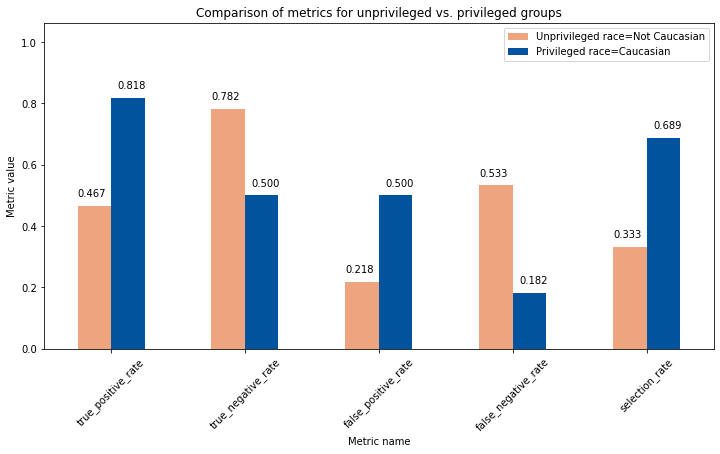

In [ ]:
# Metrics for the test set
fav_inds = dataset_orig_valid_pred.scores > best_class_thresh
dataset_orig_valid_pred.labels[fav_inds] = dataset_orig_valid_pred.favorable_label
dataset_orig_valid_pred.labels[~fav_inds] = dataset_orig_valid_pred.unfavorable_label

display(Markdown("#### Validation set"))
display(Markdown("##### Raw predictions - No fairness constraints, only maximizing balanced accuracy"))

metric_valid_bef = compute_metrics(dataset_orig_valid, dataset_orig_valid_pred, 
                unprivileged_groups, privileged_groups)

protected_attribute_names=['sex', 'race']
protected_attribute_maps = [{0.0: 'Male', 1.0: 'Female'}, {1.0: 'Caucasian', 0.0: 'Not Caucasian'}]

visualise_metrics(dataset_orig_valid, dataset_orig_valid_pred, 
                unprivileged_groups, privileged_groups, 
                protected_attribute_maps, protected_attribute_names,
                    "two_year_recid")


###### Predictions from test set

#### Test set

##### Raw predictions - No fairness constraints, only maximizing balanced accuracy

Balanced accuracy = 0.6364
Statistical parity difference = -0.3442
Disparate impact = 0.4958
Average odds difference = -0.3207
Equal opportunity difference = -0.2854
Theil index = 0.2778
Overall accuracy 0.635


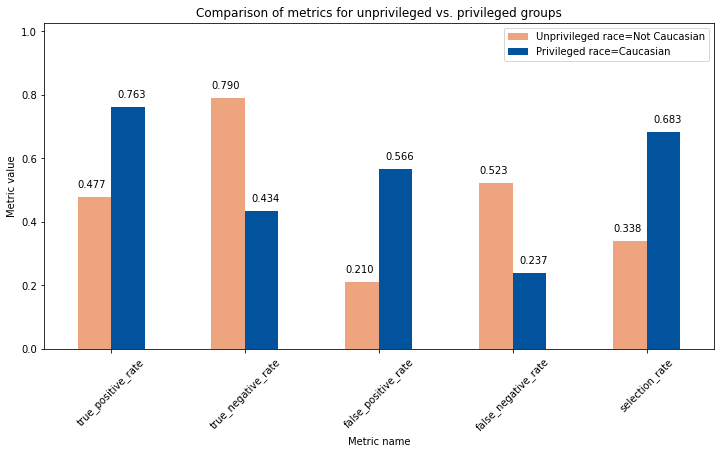

In [ ]:

# Metrics for the test set
fav_inds = dataset_orig_test_pred.scores > best_class_thresh
dataset_orig_test_pred.labels[fav_inds] = dataset_orig_test_pred.favorable_label
dataset_orig_test_pred.labels[~fav_inds] = dataset_orig_test_pred.unfavorable_label

display(Markdown("#### Test set"))
display(Markdown("##### Raw predictions - No fairness constraints, only maximizing balanced accuracy"))

metric_test_bef_COMPAS_RFC = compute_metrics(dataset_orig_test, dataset_orig_test_pred, 
                unprivileged_groups, privileged_groups)


visualise_metrics(dataset_orig_test, dataset_orig_test_pred,
                    unprivileged_groups, privileged_groups, 
                    protected_attribute_maps, protected_attribute_names,
                    "two_year_recid")

##### Simple mitigation (ROC)

In [ ]:
# Metric used (should be one of allowed_metrics)
metric_name = "Statistical parity difference"

# Upper and lower bound on the fairness metric used
metric_ub = 0.05
metric_lb = -0.05
        
#random seed for calibrated equal odds prediction
np.random.seed(1)

# Verify metric name
allowed_metrics = ["Statistical parity difference",
                   "Average odds difference",
                   "Equal opportunity difference"]
if metric_name not in allowed_metrics:
    raise ValueError("Metric name should be one of allowed metrics")
    
ROC = RejectOptionClassification(unprivileged_groups=unprivileged_groups, 
                                 privileged_groups=privileged_groups, 
                                 low_class_thresh=0.01, high_class_thresh=0.99,
                                  num_class_thresh=100, num_ROC_margin=50,
                                  metric_name=metric_name,
                                  metric_ub=metric_ub, metric_lb=metric_lb)
ROC = ROC.fit(dataset_orig_valid, dataset_orig_valid_pred)

In [ ]:
print("Best balanced accuracy (no fairness constraints) = %.4f" % np.max(ba_arr))
print("Optimal classification threshold (no fairness constraints) = %.4f" % best_class_thresh)
print()
print("Optimal classification threshold (with fairness constraints) = %.4f" % ROC.classification_threshold)
print("Optimal ROC margin = %.4f" % ROC.ROC_margin)

Best balanced accuracy (no fairness constraints) = 0.6574
Optimal classification threshold (no fairness constraints) = 0.5742

Optimal classification threshold (with fairness constraints) = 0.5346
Optimal ROC margin = 0.0760


##### Predictions (with fairness)

###### Predictions from validation set


#### Validation set

##### Transformed predictions - With fairness constraints

Balanced accuracy = 0.6477
Statistical parity difference = -0.0457
Disparate impact = 0.9145
Average odds difference = -0.0017
Equal opportunity difference = -0.0629
Theil index = 0.2477
Overall accuracy 0.648


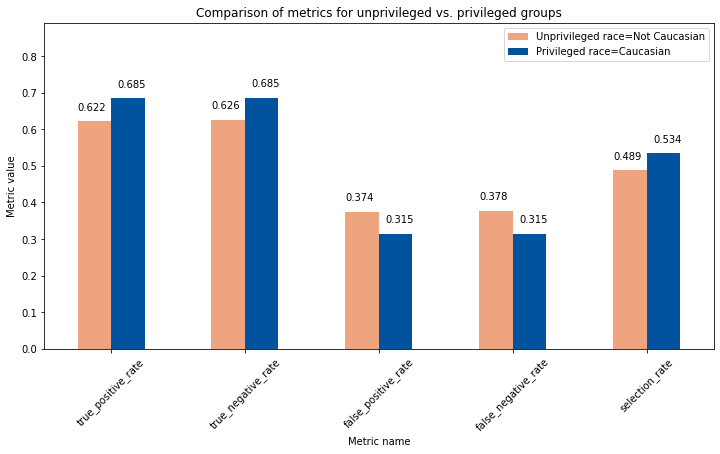

In [ ]:
# Transform the validation set
dataset_transf_valid_pred = ROC.predict(dataset_orig_valid_pred)

display(Markdown("#### Validation set"))
display(Markdown("##### Transformed predictions - With fairness constraints"))
metric_valid_aft = compute_metrics(dataset_orig_valid, dataset_transf_valid_pred, 
                unprivileged_groups, privileged_groups)

visualise_metrics(dataset_orig_valid, dataset_transf_valid_pred,
                    unprivileged_groups, privileged_groups, 
                    protected_attribute_maps, protected_attribute_names,
                    "two_year_recid")

###### Predictions from test set

#### Test set

##### Transformed predictions - With fairness constraints

Balanced accuracy = 0.6173
Statistical parity difference = 0.0360
Disparate impact = 1.0738
Average odds difference = 0.0562
Equal opportunity difference = 0.1313
Theil index = 0.2760
Overall accuracy 0.617


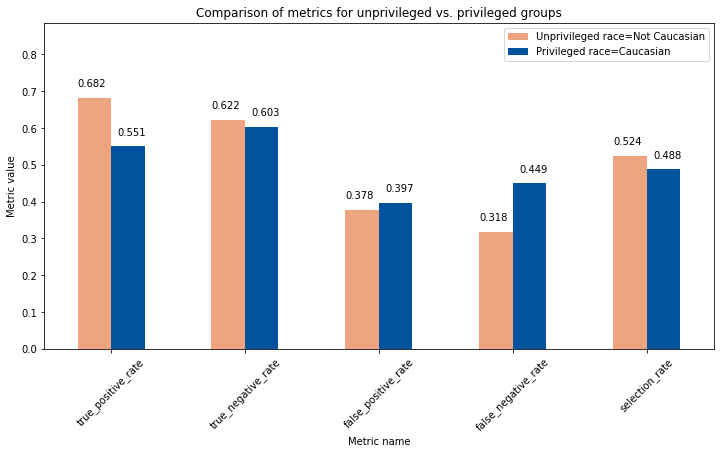

In [ ]:
# Metrics for the transformed test set
dataset_transf_test_pred = ROC.predict(dataset_orig_test_pred)

display(Markdown("#### Test set"))
display(Markdown("##### Transformed predictions - With fairness constraints"))
metric_test_aft_COMPAS_RFC = compute_metrics(dataset_orig_test, dataset_transf_test_pred, 
                unprivileged_groups, privileged_groups)

visualise_metrics(dataset_orig_test, dataset_transf_test_pred,
                    unprivileged_groups, privileged_groups, 
                    protected_attribute_maps, protected_attribute_names,
                    "two_year_recid")

### **ADULT**

In [ ]:
# Setup ADULT
protected_attribute_used = 1

dataset_orig = AdultDataset()
if protected_attribute_used == 1:
    privileged_groups = [{'sex': 1}]
    unprivileged_groups = [{'sex': 0}]
    dataset_orig = load_preproc_data_adult(['sex'])
else:
    privileged_groups = [{'race': 1}]
    unprivileged_groups = [{'race': 0}]
    dataset_orig = load_preproc_data_adult(['race'])

In [ ]:
# Get the dataset and split into train and test
dataset_orig_train, dataset_orig_vt = dataset_orig.split([0.7], shuffle=True)
dataset_orig_valid, dataset_orig_test = dataset_orig_vt.split([0.5], shuffle=True)

Describe the data

In [ ]:
# print out some labels, names, etc.
display(Markdown("#### Training Dataset shape"))
print(dataset_orig_train.features.shape)
display(Markdown("#### Favorable and unfavorable labels"))
print(dataset_orig_train.favorable_label, dataset_orig_train.unfavorable_label)
display(Markdown("#### Protected attribute names"))
print(dataset_orig_train.protected_attribute_names)
display(Markdown("#### Privileged and unprivileged protected attribute values"))
print(dataset_orig_train.privileged_protected_attributes, 
      dataset_orig_train.unprivileged_protected_attributes)
display(Markdown("#### Dataset feature names"))
print(dataset_orig_train.feature_names)

#### Training Dataset shape

(34189, 18)


#### Favorable and unfavorable labels

1.0 0.0


#### Protected attribute names

['sex']


#### Privileged and unprivileged protected attribute values

[array([1.])] [array([0.])]


#### Dataset feature names

['race', 'sex', 'Age (decade)=10', 'Age (decade)=20', 'Age (decade)=30', 'Age (decade)=40', 'Age (decade)=50', 'Age (decade)=60', 'Age (decade)=>=70', 'Education Years=6', 'Education Years=7', 'Education Years=8', 'Education Years=9', 'Education Years=10', 'Education Years=11', 'Education Years=12', 'Education Years=<6', 'Education Years=>12']


Metric for original data

In [ ]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig_train, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.190244


#### ML model 1 (LogisticRegression)

##### **Train classifier on original data**

In [ ]:
scale_orig = StandardScaler()
X_train = scale_orig.fit_transform(dataset_orig_train.features)
y_train = dataset_orig_train.labels.ravel()

lmod = LogisticRegression()
lmod.fit(X_train, y_train)
y_train_pred = lmod.predict(X_train)

# positive class index
pos_ind = np.where(lmod.classes_ == dataset_orig_train.favorable_label)[0][0]

dataset_orig_train_pred = dataset_orig_train.copy(deepcopy=True)
dataset_orig_train_pred.labels = y_train_pred

Obtain scores from validation and test sets

In [ ]:
dataset_orig_valid_pred = dataset_orig_valid.copy(deepcopy=True)
X_valid = scale_orig.transform(dataset_orig_valid_pred.features)
y_valid = dataset_orig_valid_pred.labels
dataset_orig_valid_pred.scores = lmod.predict_proba(X_valid)[:,pos_ind].reshape(-1,1)

dataset_orig_test_pred = dataset_orig_test.copy(deepcopy=True)
X_test = scale_orig.transform(dataset_orig_test_pred.features)
y_test = dataset_orig_test_pred.labels
dataset_orig_test_pred.scores = lmod.predict_proba(X_test)[:,pos_ind].reshape(-1,1)

##### **Find the optimal parameters from the validation set**



Best threshold for classification only (no fairness)

In [ ]:
num_thresh = 100
ba_arr = np.zeros(num_thresh)
class_thresh_arr = np.linspace(0.01, 0.99, num_thresh)
for idx, class_thresh in enumerate(class_thresh_arr):
    
    fav_inds = dataset_orig_valid_pred.scores > class_thresh
    dataset_orig_valid_pred.labels[fav_inds] = dataset_orig_valid_pred.favorable_label
    dataset_orig_valid_pred.labels[~fav_inds] = dataset_orig_valid_pred.unfavorable_label
    
    classified_metric_orig_valid = ClassificationMetric(dataset_orig_valid,
                                             dataset_orig_valid_pred, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
    
    ba_arr[idx] = 0.5*(classified_metric_orig_valid.true_positive_rate()\
                       +classified_metric_orig_valid.true_negative_rate())

best_ind = np.where(ba_arr == np.max(ba_arr))[0][0]
best_class_thresh = class_thresh_arr[best_ind]

print("Best balanced accuracy (no fairness constraints) = %.4f" % np.max(ba_arr))
print("Optimal classification threshold (no fairness constraints) = %.4f" % best_class_thresh)

Best balanced accuracy (no fairness constraints) = 0.7463
Optimal classification threshold (no fairness constraints) = 0.2872


##### Predictions (no fairness)

###### Predictions from validation set

#### Validation set

##### Raw predictions - No fairness constraints, only maximizing balanced accuracy

Balanced accuracy = 0.7463
Statistical parity difference = -0.3670
Disparate impact = 0.2744
Average odds difference = -0.3140
Equal opportunity difference = -0.3666
Theil index = 0.1113
Overall accuracy 0.742


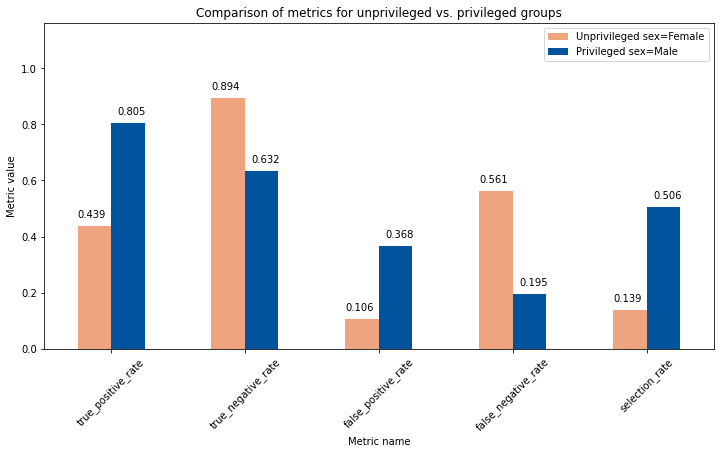

In [ ]:
# Metrics for the test set
fav_inds = dataset_orig_valid_pred.scores > best_class_thresh
dataset_orig_valid_pred.labels[fav_inds] = dataset_orig_valid_pred.favorable_label
dataset_orig_valid_pred.labels[~fav_inds] = dataset_orig_valid_pred.unfavorable_label

display(Markdown("#### Validation set"))
display(Markdown("##### Raw predictions - No fairness constraints, only maximizing balanced accuracy"))

metric_valid_bef = compute_metrics(dataset_orig_valid, dataset_orig_valid_pred, 
                unprivileged_groups, privileged_groups)

protected_attribute_names= ['race', 'sex']
protected_attribute_maps = [{1.0: 'White', 0.0: 'Non-white'}, {1.0: 'Male', 0.0: 'Female'}]

visualise_metrics(dataset_orig_valid, dataset_orig_valid_pred, 
                unprivileged_groups, privileged_groups, 
                protected_attribute_maps, protected_attribute_names,
                    "Income Binary")


###### Predictions from test set

#### Test set

##### Raw predictions - No fairness constraints, only maximizing balanced accuracy

Balanced accuracy = 0.7437
Statistical parity difference = -0.3580
Disparate impact = 0.2794
Average odds difference = -0.3181
Equal opportunity difference = -0.3769
Theil index = 0.1129
Overall accuracy 0.741


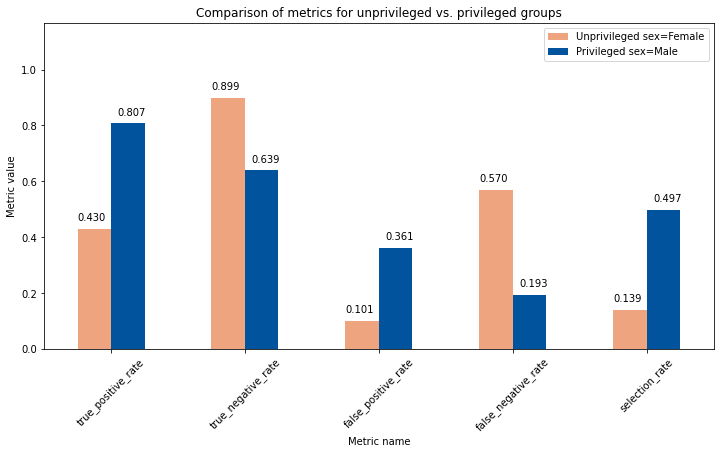

In [ ]:

# Metrics for the test set
fav_inds = dataset_orig_test_pred.scores > best_class_thresh
dataset_orig_test_pred.labels[fav_inds] = dataset_orig_test_pred.favorable_label
dataset_orig_test_pred.labels[~fav_inds] = dataset_orig_test_pred.unfavorable_label

display(Markdown("#### Test set"))
display(Markdown("##### Raw predictions - No fairness constraints, only maximizing balanced accuracy"))

metric_test_bef_ADULT_LR = compute_metrics(dataset_orig_test, dataset_orig_test_pred, 
                unprivileged_groups, privileged_groups)


visualise_metrics(dataset_orig_test, dataset_orig_test_pred,
                    unprivileged_groups, privileged_groups, 
                    protected_attribute_maps, protected_attribute_names,
                    "Income Binary")

##### Simple mitigation (ROC)

In [ ]:
# Metric used (should be one of allowed_metrics)
metric_name = "Statistical parity difference"

# Upper and lower bound on the fairness metric used
metric_ub = 0.05
metric_lb = -0.05
        
#random seed for calibrated equal odds prediction
np.random.seed(1)

# Verify metric name
allowed_metrics = ["Statistical parity difference",
                   "Average odds difference",
                   "Equal opportunity difference"]
if metric_name not in allowed_metrics:
    raise ValueError("Metric name should be one of allowed metrics")
    
ROC = RejectOptionClassification(unprivileged_groups=unprivileged_groups, 
                                 privileged_groups=privileged_groups, 
                                 low_class_thresh=0.01, high_class_thresh=0.99,
                                  num_class_thresh=100, num_ROC_margin=50,
                                  metric_name=metric_name,
                                  metric_ub=metric_ub, metric_lb=metric_lb)
ROC = ROC.fit(dataset_orig_valid, dataset_orig_valid_pred)

In [ ]:
print("Best balanced accuracy (no fairness constraints) = %.4f" % np.max(ba_arr))
print("Optimal classification threshold (no fairness constraints) = %.4f" % best_class_thresh)
print()
print("Optimal classification threshold (with fairness constraints) = %.4f" % ROC.classification_threshold)
print("Optimal ROC margin = %.4f" % ROC.ROC_margin)

Best balanced accuracy (no fairness constraints) = 0.7463
Optimal classification threshold (no fairness constraints) = 0.2872

Optimal classification threshold (with fairness constraints) = 0.1981
Optimal ROC margin = 0.1011


##### Predictions (with fairness)

###### Predictions from validation set


#### Validation set

##### Transformed predictions - With fairness constraints

Balanced accuracy = 0.7090
Statistical parity difference = -0.0454
Disparate impact = 0.8996
Average odds difference = 0.0363
Equal opportunity difference = 0.0197
Theil index = 0.1172
Overall accuracy 0.686


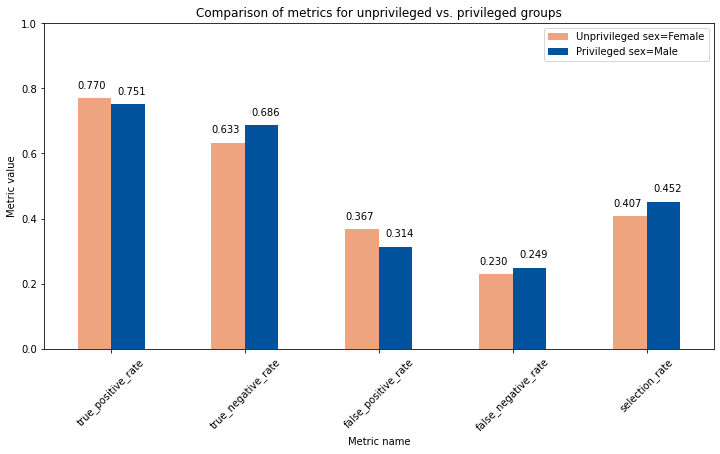

In [ ]:
# Transform the validation set
dataset_transf_valid_pred = ROC.predict(dataset_orig_valid_pred)

display(Markdown("#### Validation set"))
display(Markdown("##### Transformed predictions - With fairness constraints"))
metric_valid_aft = compute_metrics(dataset_orig_valid, dataset_transf_valid_pred, 
                unprivileged_groups, privileged_groups)

visualise_metrics(dataset_orig_valid, dataset_transf_valid_pred,
                    unprivileged_groups, privileged_groups, 
                    protected_attribute_maps, protected_attribute_names,
                    "Income Binary")

###### Predictions from test set

#### Test set

##### Transformed predictions - With fairness constraints

Balanced accuracy = 0.7141
Statistical parity difference = -0.0402
Disparate impact = 0.9088
Average odds difference = 0.0423
Equal opportunity difference = 0.0407
Theil index = 0.1171
Overall accuracy 0.694


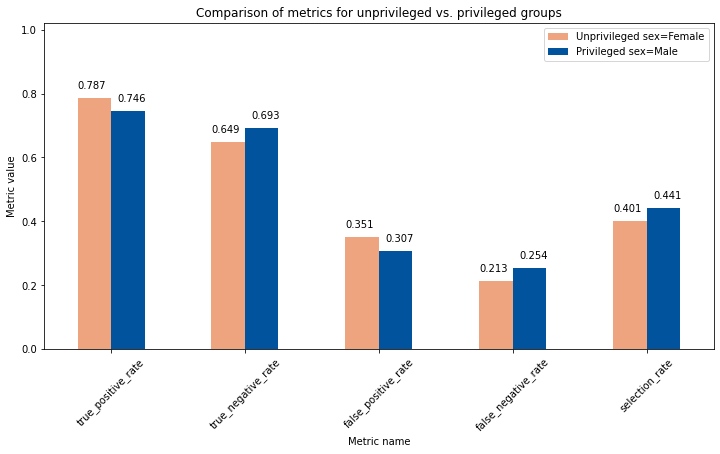

In [ ]:
# Metrics for the transformed test set
dataset_transf_test_pred = ROC.predict(dataset_orig_test_pred)

display(Markdown("#### Test set"))
display(Markdown("##### Transformed predictions - With fairness constraints"))
metric_test_aft_ADULT_LR  = compute_metrics(dataset_orig_test, dataset_transf_test_pred, 
                unprivileged_groups, privileged_groups)

visualise_metrics(dataset_orig_test, dataset_transf_test_pred,
                    unprivileged_groups, privileged_groups, 
                    protected_attribute_maps, protected_attribute_names,
                    "Income Binary")

#### ML model 2 (RandomForestClassifier)

##### **Train classifier on original data**

In [ ]:
scale_orig = StandardScaler()
X_train = scale_orig.fit_transform(dataset_orig_train.features)
y_train = dataset_orig_train.labels.ravel()

lmod = RandomForestClassifier()
lmod.fit(X_train, y_train)
y_train_pred = lmod.predict(X_train)

# positive class index
pos_ind = np.where(lmod.classes_ == dataset_orig_train.favorable_label)[0][0]

dataset_orig_train_pred = dataset_orig_train.copy(deepcopy=True)
dataset_orig_train_pred.labels = y_train_pred

Obtain scores from validation and test sets

In [ ]:
dataset_orig_valid_pred = dataset_orig_valid.copy(deepcopy=True)
X_valid = scale_orig.transform(dataset_orig_valid_pred.features)
y_valid = dataset_orig_valid_pred.labels
dataset_orig_valid_pred.scores = lmod.predict_proba(X_valid)[:,pos_ind].reshape(-1,1)

dataset_orig_test_pred = dataset_orig_test.copy(deepcopy=True)
X_test = scale_orig.transform(dataset_orig_test_pred.features)
y_test = dataset_orig_test_pred.labels
dataset_orig_test_pred.scores = lmod.predict_proba(X_test)[:,pos_ind].reshape(-1,1)

##### **Find the optimal parameters from the validation set**



Best threshold for classification only (no fairness)

In [ ]:
num_thresh = 100
ba_arr = np.zeros(num_thresh)
class_thresh_arr = np.linspace(0.01, 0.99, num_thresh)
for idx, class_thresh in enumerate(class_thresh_arr):
    
    fav_inds = dataset_orig_valid_pred.scores > class_thresh
    dataset_orig_valid_pred.labels[fav_inds] = dataset_orig_valid_pred.favorable_label
    dataset_orig_valid_pred.labels[~fav_inds] = dataset_orig_valid_pred.unfavorable_label
    
    classified_metric_orig_valid = ClassificationMetric(dataset_orig_valid,
                                             dataset_orig_valid_pred, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
    
    ba_arr[idx] = 0.5*(classified_metric_orig_valid.true_positive_rate()\
                       +classified_metric_orig_valid.true_negative_rate())

best_ind = np.where(ba_arr == np.max(ba_arr))[0][0]
best_class_thresh = class_thresh_arr[best_ind]

print("Best balanced accuracy (no fairness constraints) = %.4f" % np.max(ba_arr))
print("Optimal classification threshold (no fairness constraints) = %.4f" % best_class_thresh)

Best balanced accuracy (no fairness constraints) = 0.7465
Optimal classification threshold (no fairness constraints) = 0.2575


##### Predictions (no fairness)

###### Predictions from validation set

#### Validation set

##### Raw predictions - No fairness constraints, only maximizing balanced accuracy

Balanced accuracy = 0.7465
Statistical parity difference = -0.3691
Disparate impact = 0.2733
Average odds difference = -0.3160
Equal opportunity difference = -0.3685
Theil index = 0.1110
Overall accuracy 0.741


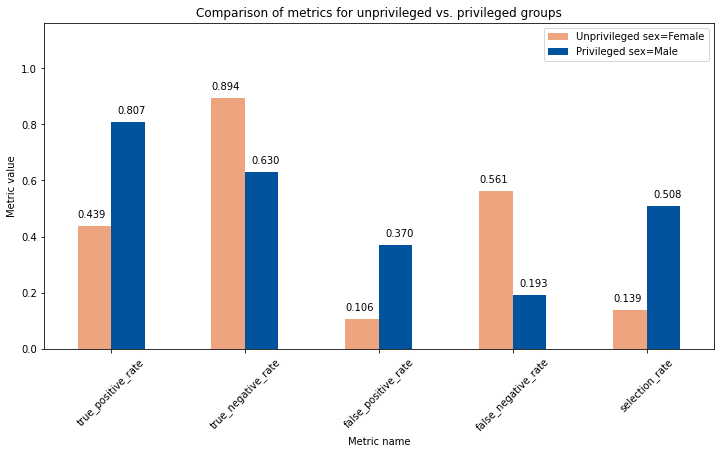

In [ ]:
# Metrics for the test set
fav_inds = dataset_orig_valid_pred.scores > best_class_thresh
dataset_orig_valid_pred.labels[fav_inds] = dataset_orig_valid_pred.favorable_label
dataset_orig_valid_pred.labels[~fav_inds] = dataset_orig_valid_pred.unfavorable_label

display(Markdown("#### Validation set"))
display(Markdown("##### Raw predictions - No fairness constraints, only maximizing balanced accuracy"))

metric_valid_bef = compute_metrics(dataset_orig_valid, dataset_orig_valid_pred, 
                unprivileged_groups, privileged_groups)

visualise_metrics(dataset_orig_valid, dataset_orig_valid_pred, 
                unprivileged_groups, privileged_groups, 
                protected_attribute_maps, protected_attribute_names,
                    "Income Binary")


###### Predictions from test set
<a name="ADULT_RFC_BEFORE"></a>

#### Test set

##### Raw predictions - No fairness constraints, only maximizing balanced accuracy

Balanced accuracy = 0.7433
Statistical parity difference = -0.3627
Disparate impact = 0.2775
Average odds difference = -0.3225
Equal opportunity difference = -0.3802
Theil index = 0.1125
Overall accuracy 0.739


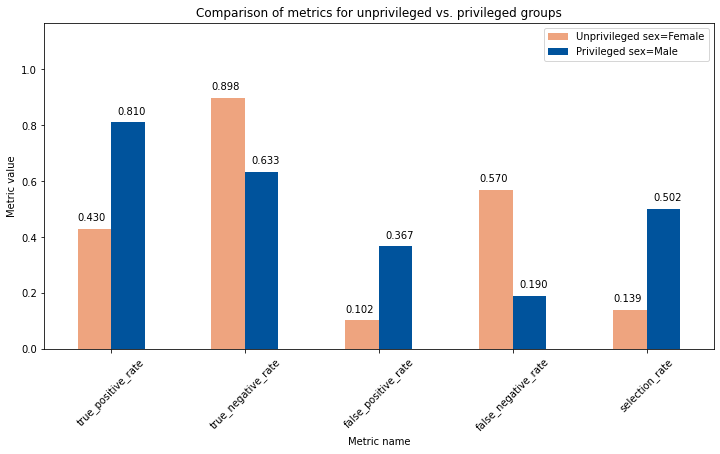

In [ ]:

# Metrics for the test set
fav_inds = dataset_orig_test_pred.scores > best_class_thresh
dataset_orig_test_pred.labels[fav_inds] = dataset_orig_test_pred.favorable_label
dataset_orig_test_pred.labels[~fav_inds] = dataset_orig_test_pred.unfavorable_label

display(Markdown("#### Test set"))
display(Markdown("##### Raw predictions - No fairness constraints, only maximizing balanced accuracy"))

metric_test_bef_ADULT_RFC = compute_metrics(dataset_orig_test, dataset_orig_test_pred, 
                unprivileged_groups, privileged_groups)


visualise_metrics(dataset_orig_test, dataset_orig_test_pred,
                    unprivileged_groups, privileged_groups, 
                    protected_attribute_maps, protected_attribute_names,
                    "Income Binary")

##### Simple mitigation (ROC)

In [ ]:
# Metric used (should be one of allowed_metrics)
metric_name = "Statistical parity difference"

# Upper and lower bound on the fairness metric used
metric_ub = 0.05
metric_lb = -0.05
        
#random seed for calibrated equal odds prediction
np.random.seed(1)

# Verify metric name
allowed_metrics = ["Statistical parity difference",
                   "Average odds difference",
                   "Equal opportunity difference"]
if metric_name not in allowed_metrics:
    raise ValueError("Metric name should be one of allowed metrics")
    
ROC = RejectOptionClassification(unprivileged_groups=unprivileged_groups, 
                                 privileged_groups=privileged_groups, 
                                 low_class_thresh=0.01, high_class_thresh=0.99,
                                  num_class_thresh=100, num_ROC_margin=50,
                                  metric_name=metric_name,
                                  metric_ub=metric_ub, metric_lb=metric_lb)
ROC = ROC.fit(dataset_orig_valid, dataset_orig_valid_pred)

In [ ]:
print("Best balanced accuracy (no fairness constraints) = %.4f" % np.max(ba_arr))
print("Optimal classification threshold (no fairness constraints) = %.4f" % best_class_thresh)
print()
print("Optimal classification threshold (with fairness constraints) = %.4f" % ROC.classification_threshold)
print("Optimal ROC margin = %.4f" % ROC.ROC_margin)

Best balanced accuracy (no fairness constraints) = 0.7465
Optimal classification threshold (no fairness constraints) = 0.2575

Optimal classification threshold (with fairness constraints) = 0.2278
Optimal ROC margin = 0.1069


##### Predictions (with fairness)

###### Predictions from validation set


#### Validation set

##### Transformed predictions - With fairness constraints

Balanced accuracy = 0.7088
Statistical parity difference = -0.0476
Disparate impact = 0.8787
Average odds difference = 0.0404
Equal opportunity difference = 0.0326
Theil index = 0.1289
Overall accuracy 0.717


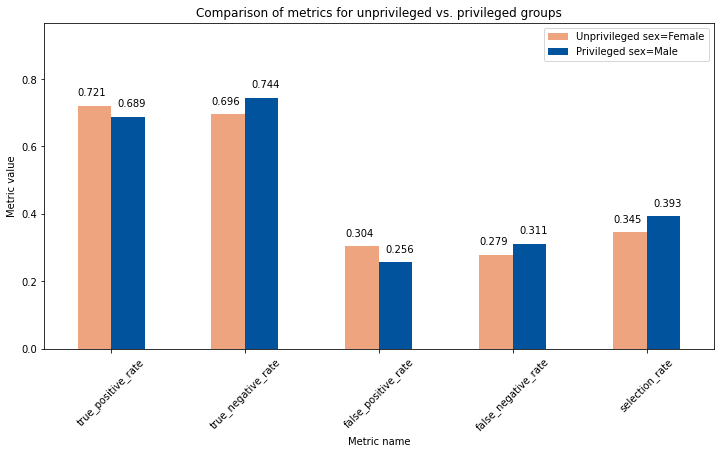

In [ ]:
# Transform the validation set
dataset_transf_valid_pred = ROC.predict(dataset_orig_valid_pred)

display(Markdown("#### Validation set"))
display(Markdown("##### Transformed predictions - With fairness constraints"))
metric_valid_aft = compute_metrics(dataset_orig_valid, dataset_transf_valid_pred, 
                unprivileged_groups, privileged_groups)

visualise_metrics(dataset_orig_valid, dataset_transf_valid_pred,
                    unprivileged_groups, privileged_groups, 
                    protected_attribute_maps, protected_attribute_names,
                    "Income Binary")

###### Predictions from test set
<a name="ADULT_RFC_AFTER"></a>

#### Test set

##### Transformed predictions - With fairness constraints

Balanced accuracy = 0.7133
Statistical parity difference = -0.0317
Disparate impact = 0.9167
Average odds difference = 0.0418
Equal opportunity difference = 0.0273
Theil index = 0.1283
Overall accuracy 0.723


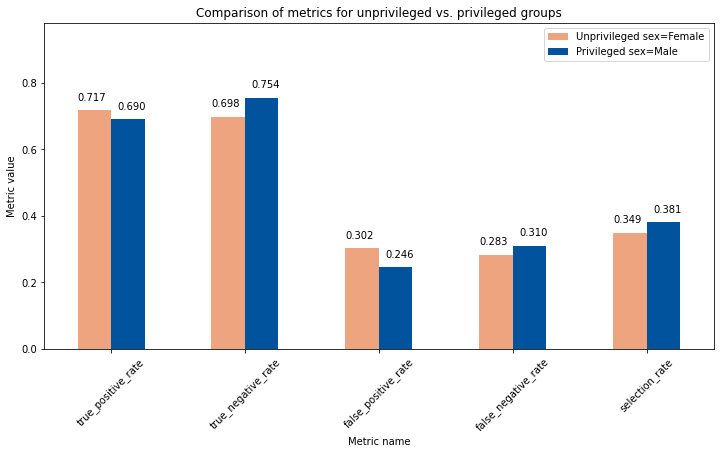

In [ ]:
# Metrics for the transformed test set
dataset_transf_test_pred = ROC.predict(dataset_orig_test_pred)

display(Markdown("#### Test set"))
display(Markdown("##### Transformed predictions - With fairness constraints"))
metric_test_aft_ADULT_RFC = compute_metrics(dataset_orig_test, dataset_transf_test_pred, 
                unprivileged_groups, privileged_groups)

visualise_metrics(dataset_orig_test, dataset_transf_test_pred,
                    unprivileged_groups, privileged_groups, 
                    protected_attribute_maps, protected_attribute_names,
                    "Income Binary")

### **Results**


#### COMPAS
<a name="prelim_results_compas"></a>

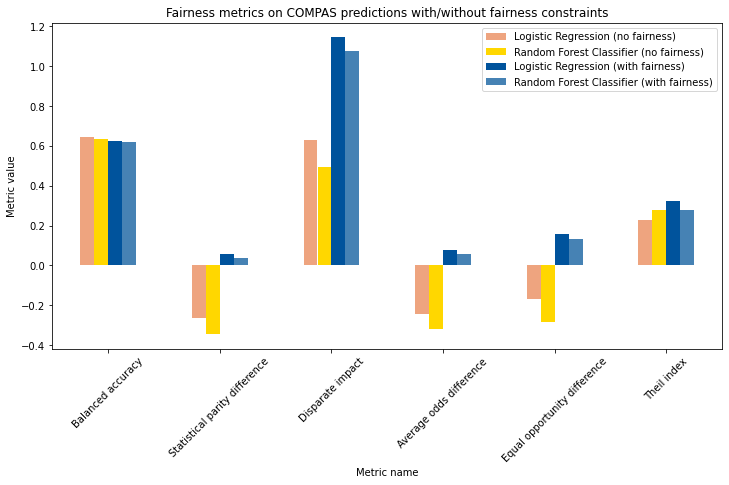

In [ ]:
results = [
  # Before mitigation
  metric_test_bef_COMPAS_LR,
  metric_test_bef_COMPAS_RFC,
  # After mitigation
  metric_test_aft_COMPAS_LR,
  metric_test_aft_COMPAS_RFC,
]
metrics = list(results[0].keys())
conditions = [
    "Logistic Regression (no fairness)",
    "Random Forest Classifier (no fairness)",
    "Logistic Regression (with fairness)",
    "Random Forest Classifier (with fairness)",
]

results = [result.values() for result in results]
results = list(zip(*results))
import numpy as np
results = np.array(results).transpose()

import pandas as pd
from matplotlib import pyplot as plt
from pprint import pprint

plotdata = pd.DataFrame(
    {conditions[i]: result for i, result in enumerate(results)},
    index=metrics,
)
plotdata.plot(kind="bar", figsize=(12, 6), color=["#EEA47FFF", "gold", "#00539CFF", "steelblue"])
plt.title("Fairness metrics on COMPAS predictions with/without fairness constraints")
plt.xticks(rotation=45)
plt.xlabel("Metric name")
plt.ylabel("Metric value")

plt.show()


#### ADULT
<a name="*prelim_results_adult*"></a>

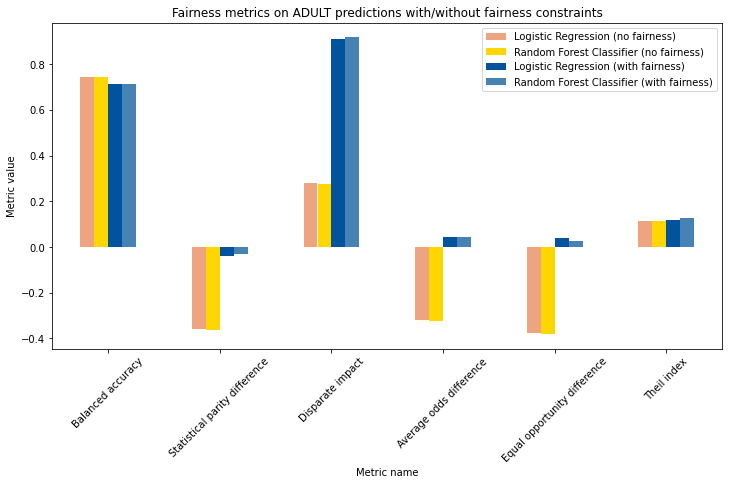

In [ ]:
results = [
  # Before mitigation
  metric_test_bef_ADULT_LR,
  metric_test_bef_ADULT_RFC,
  # After mitigation
  metric_test_aft_ADULT_LR,
  metric_test_aft_ADULT_RFC,
]
metrics = list(results[0].keys())
conditions = [
    "Logistic Regression (no fairness)",
    "Random Forest Classifier (no fairness)",
    "Logistic Regression (with fairness)",
    "Random Forest Classifier (with fairness)",
]

results = [result.values() for result in results]
results = list(zip(*results))
import numpy as np
results = np.array(results).transpose()

import pandas as pd
from matplotlib import pyplot as plt
from pprint import pprint

plotdata = pd.DataFrame(
    {conditions[i]: result for i, result in enumerate(results)},
    index=metrics,
)
plotdata.plot(kind="bar", figsize=(12, 6), color=["#EEA47FFF", "gold", "#00539CFF", "steelblue"])
plt.title("Fairness metrics on ADULT predictions with/without fairness constraints")
plt.xticks(rotation=45)
plt.xlabel("Metric name")
plt.ylabel("Metric value")

plt.show()


#### **Summary**
Visualisations throughout the preliminary analysis show that there are significant differences in the following basic metrics prior to mitigation: 

* True Positive Rate (TPR)
* False Positive Rate (FPR)
* True Negative Rate (TNR)
* False Negative Rate (FNR)
* Selection Rate (probability of having favourable prediction). 

For example, there is more than 200% difference in selection rate [here](#ADULT_RFC_BEFORE), as males have about 50% chance of being classified favourably (income >50K) while females have only about 14%.

It is also shown that ROC mitigation is effective in reducing these differences. For the same ML model and dataset, ROC has reduced the difference in selection rate from the last example to less than 20% as demonstrated [here](#ADULT_RFC_AFTER).

Finally, we can observe the effects of the mitigation process on the fairness definitions/metrics in [here](#prelim_results_compas) and [here](#prelim_results_adult). Generally, the values of the metrics (except for Theil Index) **got closer to their optimal values** for both datasets and both ML models, as observable from the difference in the gold and blue columns corresponding to the before-mitigation and after-mitigation conditions respectively. 

The optimal metric values/observations are listed below for convenience; these are determined by the fairness definitions [7] earlier in this subsection and the [AIF360 documentation](https://aif360.readthedocs.io/en/latest/modules/generated/aif360.metrics.ClassificationMetric.html#aif360.metrics.ClassificationMetric.average_abs_odds_difference).



*   Balanced accuracy should remain the same (not reduce)
*   Statistical Parity Difference = 0
*   Disparate Impact = 1
*   Average Odds Difference = 0
*   Equal Opportunity Difference = 0
*   Theil Index = 0










## **1.4 Research gaps**


Considering the relevant literature and the preliminary analysis, the following gaps are identified: 

1. Mitigation is done with a single fairness metric/definition as constraint.  Since no single fairness definition is complete, the first gap is a lack of mitigation that allows arbitrary combination of multiple metrics.  

2. There is a lack of clarity when it comes to interrelation between various metrics including the fairness definitions and accuracy, e.g. how will the accuracy/fairness-metrics vary as we impose different fairness constraints?
Given that trade-off between some metrics are in fact impossible to resolve and that there is no universal measure of fairness [7], it is important to understand the implication of each metric precisely and their interrelations.

## **1.5 Aims**


To address the gaps identified in the previous sub-section, the aims of our explorations are as below:

* Experiment with different fairness definitions in mitigating bias
* Measure the trade-off between accuracy and different fairness definitions
* Measure the trade-off between different fairness metrics

# **2 Methodology**

## **Multi-metric mitigation**

# **3 Results**

### **Define Modified CalibratedEqOddsPostprocessing and Reject Option Classification**

VariableCEP uses set_NP to adjust false positive / false negative tradeoff

InquisitiveRejectOptionClassification uses **bold text**

In [ ]:
from aif360.algorithms.postprocessing.calibrated_eq_odds_postprocessing import CalibratedEqOddsPostprocessing
from aif360.metrics.binary_label_dataset_metric import BinaryLabelDatasetMetric
from aif360.metrics.classification_metric import ClassificationMetric
from scipy import optimize
from tqdm import tqdm
import numpy as np

class VariableCEP(CalibratedEqOddsPostprocessing):
    def set_NP(self, NP_rate):
      "overrides CEP false negative and fales positive rates with input"
      self.fn_rate = NP_rate[0]
      self.fp_rate = NP_rate[1]
    

def normed_rates(fp_rate, fn_rate):
    norm_const = float(fp_rate + fn_rate) if\
                      (fp_rate != 0 and fn_rate != 0) else 1
    return (fp_rate / norm_const), (fn_rate / norm_const)


from aif360.algorithms.postprocessing.reject_option_classification\
        import RejectOptionClassification

class InquisitiveRejectOptionClassification(RejectOptionClassification):

  def fit(self, dataset_true, dataset_pred, metric_fn=None):
      """Estimates the optimal classification threshold and margin for reject
      option classification that optimizes the metric provided.
      Note:
          The `fit` function is a no-op for this algorithm.
      Args:
          dataset_true (BinaryLabelDataset): Dataset containing the true
              `labels`.
          dataset_pred (BinaryLabelDataset): Dataset containing the predicted
              `scores`.
      Returns:
          RejectOptionClassification: Returns self.
      """
      fair_metric_arr = np.zeros(self.num_class_thresh*self.num_ROC_margin)
      balanced_acc_arr = np.zeros_like(fair_metric_arr)
      ROC_margin_arr = np.zeros_like(fair_metric_arr)
      class_thresh_arr = np.zeros_like(fair_metric_arr)

      cnt = 0
      # Iterate through class thresholds
      for class_thresh in np.linspace(self.low_class_thresh,
                                      self.high_class_thresh,
                                      self.num_class_thresh):

          self.classification_threshold = class_thresh
          if class_thresh <= 0.5:
              low_ROC_margin = 0.0
              high_ROC_margin = class_thresh
          else:
              low_ROC_margin = 0.0
              high_ROC_margin = (1.0-class_thresh)

          # Iterate through ROC margins
          for ROC_margin in np.linspace(
                              low_ROC_margin,
                              high_ROC_margin,
                              self.num_ROC_margin):
              self.ROC_margin = ROC_margin

              # Predict using the current threshold and margin
              dataset_transf_pred = self.predict(dataset_pred)

              dataset_transf_metric_pred = BinaryLabelDatasetMetric(
                                            dataset_transf_pred,
                                            unprivileged_groups=self.unprivileged_groups,
                                            privileged_groups=self.privileged_groups)
              classified_transf_metric = ClassificationMetric(
                                            dataset_true,
                                            dataset_transf_pred,
                                            unprivileged_groups=self.unprivileged_groups,
                                            privileged_groups=self.privileged_groups)

              ROC_margin_arr[cnt] = self.ROC_margin
              class_thresh_arr[cnt] = self.classification_threshold

              # Balanced accuracy and fairness metric computations
              balanced_acc_arr[cnt] = 0.5*(classified_transf_metric.true_positive_rate()\
                                      +classified_transf_metric.true_negative_rate())
              
              """
              CHANGE: Accept arbitrary metric function
              """
              
              if metric_fn:
                  fair_metric_arr[cnt] = metric_fn(classified_transf_metric)
              ###
              
              elif self.metric_name == "Statistical parity difference":
                  fair_metric_arr[cnt] = dataset_transf_metric_pred.mean_difference()
              elif self.metric_name == "Average odds difference":
                  fair_metric_arr[cnt] = classified_transf_metric.average_odds_difference()
              elif self.metric_name == "Equal opportunity difference":
                  fair_metric_arr[cnt] = classified_transf_metric.equal_opportunity_difference()
              
              

              cnt += 1

      rel_inds = np.logical_and(fair_metric_arr >= self.metric_lb,
                                fair_metric_arr <= self.metric_ub)
      if any(rel_inds):
          best_ind = np.where(balanced_acc_arr[rel_inds]
                              == np.max(balanced_acc_arr[rel_inds]))[0][0]
      else:
          print("Unable to satisfy fairness constraints")
          rel_inds = np.ones(len(fair_metric_arr), dtype=bool)
          best_ind = np.where(fair_metric_arr[rel_inds]
                              == np.min(fair_metric_arr[rel_inds]))[0][0]

      self.ROC_margin = ROC_margin_arr[rel_inds][best_ind]
      self.classification_threshold = class_thresh_arr[rel_inds][best_ind]

      return self

## **Calibrated Equalized Odds Postprocessing w. False Negative/False Positive Rates**

### Define search parameters, dataset and fairness metrics used

In [ ]:
## import dataset - use compas
dataset_used = "compas" # "adult", "compas"

protected_attribute_used = 2 # 1, 2 #race is 2

#random seed for calibrated equal odds prediction
randseed = 12345679

#train/validation-test split
train_split = 0.7
#for each fold - validation split (1-test split)
split_interv = 0.5

#classification threshold
class_thresh = 0.5

#include 0,1 values when performing sweep
include = False

#Number of K-fold cv repeats
N_reps = 5
#number of values between 0,1 for weight of f1 vs f2
N_values = 1000

#for if you're using ROC - which f1, f2 to use for output results AND optimization
f1_name = 'false_negative_rate'
f2_name = 'false_positive_rate'

#disable to use ROC optimiser, enable to use cpp optimizer
use_cpp = True

In [ ]:
# code to identify the protected attributes from all of the dataset features
if dataset_used == "adult":
    dataset_orig = AdultDataset()
#     dataset_orig = load_preproc_data_adult()
    if protected_attribute_used == 1:
        privileged_groups = [{'sex': 1}]
        unprivileged_groups = [{'sex': 0}]
    else:
        privileged_groups = [{'race': 1}]
        unprivileged_groups = [{'race': 0}]
    
elif dataset_used == "german":
    dataset_orig = GermanDataset()
    if protected_attribute_used == 1:
        privileged_groups = [{'sex': 1}]
        unprivileged_groups = [{'sex': 0}]
    else:
        privileged_groups = [{'age': 1}]
        unprivileged_groups = [{'age': 0}]
    
elif dataset_used == "compas":
    from aif360.datasets.compas_dataset import CompasDataset
    dataset_orig = CompasDataset()
    dataset_orig = load_preproc_data_compas()
    if protected_attribute_used == 1:
        privileged_groups = [{'sex': 1}]
        unprivileged_groups = [{'sex': 0}]
    else:
        privileged_groups = [{'race': 1}]
        unprivileged_groups = [{'race': 0}]  

In [ ]:
#train validation&test split
dataset_orig_train, dataset_orig_vt = dataset_orig.split([train_split], shuffle=True)

### Logistic Regression Baseline

In [ ]:
# Placeholder for predicted and transformed datasets
dataset_orig_train_pred = dataset_orig_train.copy(deepcopy=True)

# Logistic regression classifier and predictions for training data
scale_orig = StandardScaler()
X_train = scale_orig.fit_transform(dataset_orig_train.features)
y_train = dataset_orig_train.labels.ravel()
lmod = LogisticRegression() #logregression

#fit original model
lmod.fit(X_train, y_train)

fav_idx = np.where(lmod.classes_ == dataset_orig_train.favorable_label)[0][0]
y_train_pred_prob = lmod.predict_proba(X_train)[:,fav_idx]

# Prediction probs for training data
dataset_orig_train_pred.scores = y_train_pred_prob.reshape(-1,1)

y_train_pred = np.zeros_like(dataset_orig_train_pred.labels)
y_train_pred[y_train_pred_prob >= class_thresh] = dataset_orig_train_pred.favorable_label
y_train_pred[~(y_train_pred_prob >= class_thresh)] = dataset_orig_train_pred.unfavorable_label
dataset_orig_train_pred.labels = y_train_pred

### Set up both postprocessor and search

In [ ]:
#
# set up tradeoff cost-benefit calculation
#

negs = []
accs = []
fps = []
fns = []
privileged_options = [True,False,None]


#whether to include all fp and all fn cost functions (True)
if include == True:
    n_range = np.linspace(0.00,1.00,N_values)
if include == False:
    n_range = np.linspace(0.01,0.99,N_values)

In [ ]:
#set up equalized odds processing
cpp = VariableCEP(privileged_groups = privileged_groups,
                                        unprivileged_groups = unprivileged_groups,
                                        seed=randseed)
#ROC
ROC = InquisitiveRejectOptionClassification(unprivileged_groups=unprivileged_groups, 
                                 privileged_groups=privileged_groups, 
                                 low_class_thresh=0.01, high_class_thresh=0.99,
                                  num_class_thresh=100, num_ROC_margin=50,
                                  # metric_name=metric_name,
                                  metric_ub=0.05, metric_lb=-0.05)

In [ ]:
if use_cpp == True:
    post_processor = cpp
elif use_cpp == False:
    post_processor = ROC

### Generate randomly shuffled K-folds

In [ ]:
def vt_split_process(dataset_orig_vt,split_indexes,shuf,class_thresh):
    dataset_orig_valid, dataset_orig_test = dataset_orig_vt.split(num_or_size_splits=split_indexes,shuffle=shuf,seed=randseed)#validation_test split)
    dataset_orig_valid_pred = dataset_orig_valid.copy(deepcopy=True)
    dataset_orig_test_pred = dataset_orig_test.copy(deepcopy=True)

    dataset_new_valid_pred = dataset_orig_valid.copy(deepcopy=True)
    dataset_new_test_pred = dataset_orig_test.copy(deepcopy=True)

    X_valid = scale_orig.transform(dataset_orig_valid.features)
    y_valid_pred_prob = lmod.predict_proba(X_valid)[:,fav_idx]

    X_test = scale_orig.transform(dataset_orig_test.features)
    y_test_pred_prob = lmod.predict_proba(X_test)[:,fav_idx]

    dataset_orig_valid_pred.scores = y_valid_pred_prob.reshape(-1,1)
    dataset_orig_test_pred.scores = y_test_pred_prob.reshape(-1,1)

    y_valid_pred = np.zeros_like(dataset_orig_valid_pred.labels)
    y_valid_pred[y_valid_pred_prob >= class_thresh] = dataset_orig_valid_pred.favorable_label
    y_valid_pred[~(y_valid_pred_prob >= class_thresh)] = dataset_orig_valid_pred.unfavorable_label
    dataset_orig_valid_pred.labels = y_valid_pred
        
    y_test_pred = np.zeros_like(dataset_orig_test_pred.labels)
    y_test_pred[y_test_pred_prob >= class_thresh] = dataset_orig_test_pred.favorable_label
    y_test_pred[~(y_test_pred_prob >= class_thresh)] = dataset_orig_test_pred.unfavorable_label
    dataset_orig_test_pred.labels = y_test_pred

    return (dataset_orig_valid, dataset_orig_valid_pred, dataset_orig_test, dataset_orig_test_pred)

### Function to perform cross validation calculation with given fairness function

In [ ]:
def determine_cv_values(folds,post_processor,weight_tuple,name_tuple,pbar=None):
    for stream in folds:
        # Odds equalizing post-processing algorithm

        m1,m2,acc = np.zeros(3),np.zeros(3),np.zeros(3)

        ##########
        dataset_orig_valid, dataset_orig_valid_pred, dataset_orig_test, dataset_orig_test_pred = stream

        # Learn parameters to equalize odds and apply to create a new dataset
   
        if type(post_processor) == VariableCEP:
            f1_name = 'false_negative_rate'
            f2_name = 'false_positive_rate'
            post_processor.set_NP(weight_tuple)
            post_processor.fit(dataset_orig_valid, dataset_orig_valid_pred)
        elif type(post_processor) == InquisitiveRejectOptionClassification:
            f1_name = name_tuple[0]
            f2_name = name_tuple[1]

            post_processor.fit(dataset_orig_valid, dataset_orig_valid_pred, metric_fn = lambda metric: 
                            weight_tuple[0]*getattr(metric,f1_name)() + weight_tuple[1]*getattr(metric,f2_name)())

        dataset_transf_test_pred = post_processor.predict(dataset_orig_test_pred)

        """
        dataset_transf_valid_pred = post_processor.predict(dataset_orig_valid_pred)
        cm_transf_valid = ClassificationMetric(dataset_orig_valid, dataset_transf_valid_pred,
                                    unprivileged_groups=unprivileged_groups,
                                    privileged_groups=privileged_groups)
        """
        cm_transf_test = ClassificationMetric(dataset_orig_test, dataset_transf_test_pred,
                                    unprivileged_groups=unprivileged_groups,
                                    privileged_groups=privileged_groups)
        #cm_transf_test.difference
        
        if pbar is not None:
            pbar.update(1)
        else:
          #if using an optimizer
          out = cm_transf_test.accuracy(privileged=None)
          if diag == True:
            print(weight_tuple, out)
          return out

        for idx,PR in enumerate(privileged_options):
            try:
                m1[idx] += getattr(cm_transf_test,f1_name)(privileged=PR)
            except Exception:
                #for if there is no difference for privileged/unpriveleged groups due to nature of the metric
                m1[idx] = 0
            try:
                m2[idx] += getattr(cm_transf_test,f2_name)(privileged=PR)
            except Exception:
                m2[idx] = 0
            result = cm_transf_test.accuracy(privileged=PR)
            acc[idx] += float(result)
        
    return m1/len(folds),m2/len(folds),acc/len(folds)

In [ ]:
#kfold = cross_val_split(n_splits=reruns)
folds = []

for count in tqdm(range(N_reps)):
    si = [split_interv]
    folds.append(vt_split_process(dataset_orig_vt=dataset_orig_vt,split_indexes=si,shuf=True,class_thresh=class_thresh))

#valid, test = dataset_orig_vt.split(num_or_size_splits=si)

100%|██████████| 5/5 [00:00<00:00, 33.62it/s]


### Use Basinhopping Optimizer to maximise accuracy

In [ ]:
#OPTIMIZE SEARCH
diag = False
process = lambda arr : [float(arr),1-float(arr)]

b = [(0.01,0.99)]
minimizer_kwargs = {"bounds":b}

to_opt = lambda w : -1*determine_cv_values(folds=folds,post_processor=post_processor,weight_tuple=process(w),name_tuple=(f1_name,f2_name))

res = optimize.basinhopping(func=to_opt,x0=0.5,niter=10)
print(res)
print("Optimizer success")

                        fun: -0.6603535353535354
 lowest_optimization_result:       fun: -0.6603535353535354
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0.57461549])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 33
                        nit: 10
                       njev: 11
                          x: array([0.57461549])
Optimizer success


### Perform a search over all parameters

In [ ]:
dataset_orig_valid_pred,dataset_orig_test_pred, dataset_new_valid_pred, dataset_new_test_pred = None,None,None,None
pbar = tqdm(total=(N_reps*N_values))
diag = False
for neg in n_range:
    f1_weight = neg

    f2_weight = (1.0 - f1_weight)
    f1_weight = f1_weight

    f2_weight = f2_weight/(f1_weight+f2_weight)

    w1_score,w2_score,accuracy = determine_cv_values(folds=folds,post_processor=post_processor,weight_tuple=(f1_weight,f2_weight),name_tuple=(f1_name,f2_name),pbar=pbar)

    fns.append(w1_score)
    fps.append(w2_score)
    accs.append(accuracy)
    negs.append(neg)

100%|█████████▉| 4997/5000 [02:01<00:00, 40.87it/s]

In [ ]:
fns, fps, accs = np.array(fns)*N_reps,np.array(fps)*N_reps,np.array(accs)*N_reps

cpp_100 = (fns,fps,accs)
%store cpp_100

Stored 'cpp_100' (tuple)


In [ ]:
%store -r cpp_100
#cpp_100

### Display Results

In [ ]:
# plot results from fns, fps, accs, negs for different groups
collapse = lambda param, idx : [v[idx] for v in param]

getnames = {None:"full data", True:"privileged", False:"unprivileged"}

percentchange = lambda result: [100*((i-result[0])/result[0]) for i in result]

idx,PR = 2,None
maximised_accuracy = max(collapse(accs,idx))
maximised_idx = collapse(accs,idx).index(maximised_accuracy)
percentmax = lambda result: [100*((i-result[maximised_idx])/result[maximised_idx]) for i in result]

#### Print max and min values from search and optimizer

In [ ]:
res_string = "results measured on {}-fold shuffled cross validation on random\n{} of dataset. Postprocessor trained on {} of dataset".format(N_reps, round((1-split_interv)*(1-train_split),3),round(split_interv*(1-train_split),3))

maximised_value_idx = lambda prop, idx : collapse(prop,idx).index(max(collapse(prop,idx)))
idx = 2
values = ['min {}'.format(f1_name),'min {}'.format(f2_name), 'max accuracy']
for idv,prop in enumerate([-1*np.array(fps),-1*np.array(fns),accs]):
    print("\n"+values[idv])
    maxi = maximised_value_idx(prop,idx)


    print("{}: {}".format(f1_name, round(collapse(fps,idx)[maxi],5)))
    print("{}: {}".format(f2_name, round(collapse(fns,idx)[maxi],5)))
    print("accs: {}".format(round(collapse(accs,idx)[maxi],5)))
  
print(res_string)

print("\nFound by optimizer, max accuracy at")
lor = float(res.lowest_optimization_result.x)
print("{} = {}, {} = {}".format(f1_name,round(lor,5),f2_name,round(1-lor,5)))
print("Accuracy = {}".format(round(-1*res.lowest_optimization_result.fun,5)))


min false_negative_rate
false_negative_rate: 0.38945
false_positive_rate: 0.31218
accs: 0.64899

min false_positive_rate
false_negative_rate: 0.59045
false_positive_rate: 0.1599
accs: 0.62374

max accuracy
false_negative_rate: 0.45226
false_positive_rate: 0.22081
accs: 0.66288
results measured on 5-fold shuffled cross validation on random
0.15 of dataset. Postprocessor trained on 0.15 of dataset

Found by optimizer, max accuracy at
false_negative_rate = 0.57462, false_positive_rate = 0.42538
Accuracy = 0.66035


#### Plot the change from value at max accuracy of metrics, accuracy in search

Text(0.5, 1.0, 'compas full data\nmax_acc=0.6629, fn_cost=0.6839\nresults measured on 5-fold shuffled cross validation on random\n0.15 of dataset. Postprocessor trained on 0.15 of dataset')

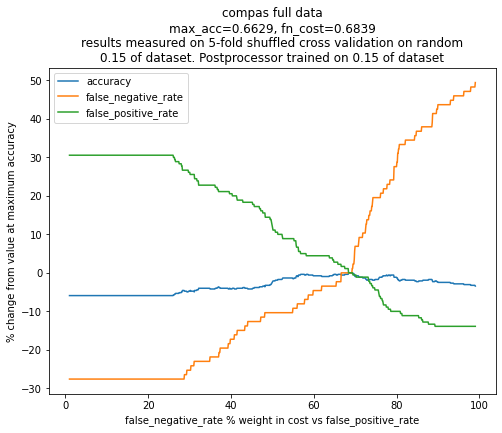

In [ ]:
plt.figure(figsize=(8,6))
negs = np.array(negs)
plt.plot(negs*100,percentmax(collapse(accs,idx)),label='accuracy')
plt.plot(negs*100,percentmax(collapse(fns,idx)),label='{}'.format(f1_name))
plt.plot(negs*100,percentmax(collapse(fps,idx)),label='{}'.format(f2_name))

xlab = '{} % weight in cost vs {}'.format(f1_name,f2_name)

plt.xlabel(xlab)
plt.ylabel("% change from value at maximum accuracy")

plt.legend()


titl = ' {}\nmax_acc={}, fn_cost={}\n'.format(getnames[PR],round(maximised_accuracy,4),round(negs[maximised_idx],4))

plt.title(dataset_used+titl+res_string)


#### Plot the metric values and accuracy

Text(0.5, 0, 'false_negative_rate % weight in cost vs false_positive_rate')

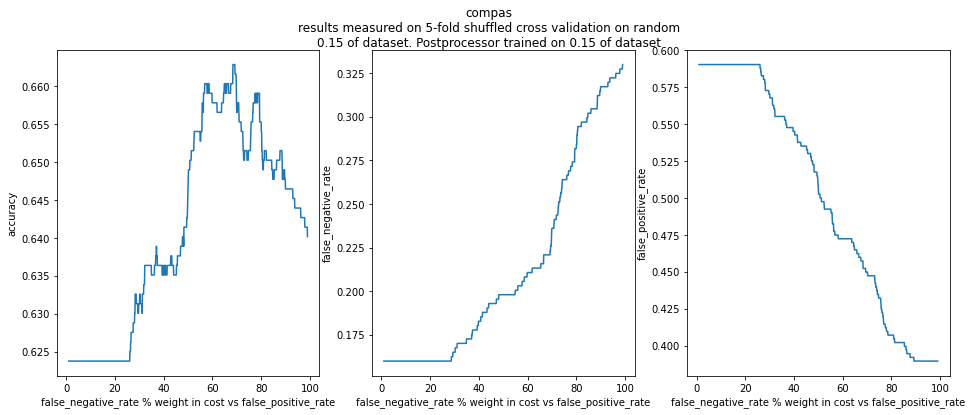

In [ ]:
  PR = None
  fig, (ax1,ax2,ax3) = plt.subplots(1, 3,sharex=True,figsize=(16,6))
  fig.suptitle(dataset_used+"\n"+res_string)

  ax1.plot(negs*100,collapse(accs,idx))
  ax1.set_ylabel("accuracy")
  ax1.set_xlabel(xlab)
  ax2.set_ylabel('{}'.format(f1_name))
  ax2.plot(negs*100,collapse(fns,idx))
  ax2.set_xlabel(xlab)
  ax3.set_ylabel('{}'.format(f2_name))
  ax3.plot(negs*100,collapse(fps,idx))
  ax3.set_xlabel(xlab)

#### Show how optimized models compare to original

In [ ]:
def determine_cv_metrics(folds,post_processor,weight_tuple,name_tuple,pbar=None):
    for id,stream in enumerate(folds):
        # Odds equalizing post-processing algorithm

        ##########
        dataset_orig_valid, dataset_orig_valid_pred, dataset_orig_test, dataset_orig_test_pred = stream

        # Learn parameters to equalize odds and apply to create a new dataset
   
        if type(post_processor) == VariableCEP:
            f1_name = 'false_negative_rate'
            f2_name = 'false_positive_rate'
            post_processor.set_NP(weight_tuple)
            post_processor.fit(dataset_orig_valid, dataset_orig_valid_pred)
        elif type(post_processor) == InquisitiveRejectOptionClassification:
            f1_name = name_tuple[0]
            f2_name = name_tuple[1]

            post_processor.fit(dataset_orig_valid, dataset_orig_valid_pred, metric_fn = lambda metric: 
                            weight_tuple[0]*getattr(metric,f1_name)() + weight_tuple[1]*getattr(metric,f2_name)())

        dataset_transf_test_pred = post_processor.predict(dataset_orig_test_pred)

        cm_transf_test = ClassificationMetric(dataset_orig_test, dataset_transf_test_pred,
                                    unprivileged_groups=unprivileged_groups,
                                    privileged_groups=privileged_groups)
        if id == 0:
          metrics = compute_metrics(dataset_orig_test, dataset_transf_test_pred, 
                        unprivileged_groups, privileged_groups, disp=False)
        else:
          results = compute_metrics(dataset_orig_test, dataset_transf_test_pred, 
                        unprivileged_groups, privileged_groups,disp=False)
          for k in results.keys():
            v = metrics[k]
            v += results[k]
            metrics[k] = v
    return results

In [ ]:
determine_cv_metrics(folds=folds,post_processor=post_processor,weight_tuple=process(lor),name_tuple=(f1_name,f2_name))

OrderedDict([('Balanced accuracy', 0.6610399714307578),
             ('Statistical parity difference', -0.27542282735879164),
             ('Disparate impact', 0.6559936227455408),
             ('Average odds difference', -0.24192509469127355),
             ('Equal opportunity difference', -0.19994807892004152),
             ('Theil index', 0.16185484036775205)])

# **4 Conclusion**

## **4.1 Limitations**


## **4.2 Future directions**

# **References**